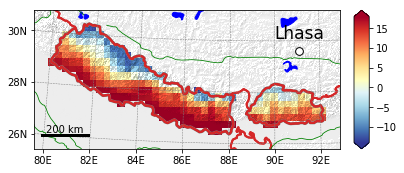

In [2]:
import salem
import matplotlib.pyplot as plt
from salem.utils import get_demo_file
ds = salem.open_xr_dataset(get_demo_file('wrfout_d01.nc'))
t2 = ds.T2.isel(Time=2)
# t2.salem.quick_map()
t2_sub = t2.salem.subset(corners=((77., 20.), (97., 35.)), crs=salem.wgs84)
# t2_sub.salem.quick_map()
shdf = salem.read_shapefile(get_demo_file('world_borders.shp'))
shdf = shdf.loc[shdf['CNTRY_NAME'].isin(['Nepal', 'Bhutan'])]  # GeoPandas' GeoDataFrame
t2_sub = t2_sub.salem.subset(shape=shdf, margin=2)  # add 2 grid points
# t2_sub.salem.quick_map()
t2_roi = t2_sub.salem.roi(shape=shdf)
# t2_roi.salem.quick_map()

# Change the country borders
smap = t2_roi.salem.get_map(data=t2_roi-273.15, cmap='RdYlBu_r', vmin=-14, vmax=18)
_ = smap.set_topography(get_demo_file('himalaya.tif'))
smap.set_shapefile(shape=shdf, color='grey', linewidth=3)
smap.set_shapefile(countries=True, color='C3', linewidths=2)

# Add oceans and lakes
smap.set_shapefile(oceans=True)
smap.set_shapefile(rivers=True,linewidths=0.8,color='green')
smap.set_shapefile(lakes=True, facecolor='blue', edgecolor='blue')

# Change the lon-lat countour setting
smap.set_lonlat_contours(add_ytick_labels=True, interval=2, linewidths=0.5,
                         linestyles='--', colors='grey')

# Add a scalebar (experimental)
smap.set_scale_bar(location=(0.10, 0.10), add_bbox=False)

smap.set_points(91.1, 29.6)
smap.set_text(90.0, 30.1, 'Lhasa', fontsize=17)

smap.visualize()
plt.savefig("Himalayas_mask.png", dpi=500, bbox_inches='tight')
plt.show()